## Análisis - Ligue 1 temporada 2015/2016 (masculina)

Vamos a hacer un análisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que características son más importantes a la hora de tomar la decisión por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuestión, vamos a analizar la Ligue 1 en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competición para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "Ligue 1"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_Ligue1 = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/Ligue 1(2015_2016_male)_reduced.csv


In [2]:
matches_in_Ligue1.head(5)

,match_id,shots_on_target_ratio_home,shots_on_target_ratio_away,average_shots_on_target_distance_home,average_shots_on_target_distance_away,shots_inside_area_ratio_home,shots_inside_area_ratio_away,pass_success_ratio_home,pass_success_ratio_away,cross_success_ratio_home,...,percentage_shots_under_pressure_home,percentage_shots_inside_area_under_pressure_home,percentage_passes_under_pressure_home,percentage_passes_inside_area_under_pressure_home,percentage_set_piece_shots_home,percentage_set_piece_shots_inside_area_home,percentage_substitutions_home,percentage_tactical_substitutions_home,percentage_tactical_changes_home,percentage_formation_changes_home
0,3829421,0.333333,0.166667,25.129294,12.803802,0.555556,0.583333,0.763676,0.809074,0.307692,...,0.333333,0.333333,0.566265,1.0,0.555556,0.666667,0.5,0.50,0.750000,0.666667
1,3829420,0.307692,0.428571,20.107446,19.128651,0.230769,0.714286,0.747412,0.783058,0.500000,...,0.375000,0.166667,0.565217,0.5,0.500000,0.222222,0.5,0.40,0.444444,0.750000
2,3829413,0.166667,0.333333,21.737917,19.467647,0.333333,0.833333,0.798755,0.829213,0.200000,...,0.000000,0.000000,0.520000,0.0,0.666667,0.500000,0.5,0.50,0.500000,0.000000
3,3829416,0.333333,0.352941,12.209684,15.420536,0.666667,0.764706,0.741688,0.810964,0.250000,...,0.250000,0.285714,0.514085,0.0,0.384615,0.333333,0.5,0.25,0.625000,1.000000
4,3829422,0.227273,0.500000,20.112628,20.723704,0.500000,0.500000,0.876560,0.786082,0.142857,...,0.444444,0.600000,0.684564,1.0,0.875000,0.875000,0.5,0.50,0.500000,0.500000


Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentación) y mostramos sus resultados.

In [3]:
from src.analysis import ligue1_best_model

best_model_Ligue1, evaluation_metrics, X_train_Ligue1, X_test_Ligue1, encoder_Ligue1, match_ids_test = ligue1_best_model(matches_in_Ligue1)
print(f"The best model for Ligue 1 is {best_model_Ligue1}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for Ligue 1 is RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, n_estimators=60, random_state=42)
The evaluation metrics for the best model are:


,Train Accuracy,Test Accuracy,Precision Macro,Precision Weighted,Recall Macro,Recall Weighted,F1 Macro,F1 Weighted
Random Forest,0.774086,0.618421,0.591787,0.60164,0.589015,0.618421,0.581168,0.601067


Una vez ya tenemos el mejor modelo entrenado comenzamos el análisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Random Forest, nos basaremos en la importancia de las características proporcionada por el modelo a través del método `feature_importances_`.
- A diferencia de la regresión logística, que asigna coeficientes específicos a cada clase, Random Forest evalúa la relevancia de cada variable para el modelo en su conjunto, sin distinguir entre clases.
- Este modelo captura tanto relaciones lineales como no lineales, permitiendo analizar interacciones entre múltiples factores y su impacto en la predicción del resultado.
- Sin embargo, no indica la dirección del efecto de cada característica (positiva o negativa), sino únicamente su importancia relativa en el rendimiento del modelo.

El gráfico presentado a continuación muestra la importancia global de cada característica en la predicción de los resultados de los partidos en la Ligue 1.
- Valores más altos indican que una característica tiene mayor peso en las predicciones del modelo.
- Valores cercanos a cero indican que la característica no aporta información significativa para la clasificación del resultado.

Este análisis nos permite identificar qué factores son clave en la predicción del resultado de los partidos, considerando relaciones más complejas y capturando patrones que un modelo lineal no podría detectar.

Features with zero importance across all classes:
['tackles_success_ratio_home', 'dribbles_success_ratio_away', 'possession_percentage_home', 'last_3_matches_form_home', 'is_valid_last_3_matches_form_home', 'is_valid_last_3_matches_form_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'is_valid_win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_win_last_home_match_home_team', 'win_last_away_match_away_team', 'is_valid_win_last_away_match_away_team', 'goals_conceded_last_match_home', 'is_valid_goals_conceded_last_match_home', 'goals_conceded_last_match_away', 'is_valid_goals_conceded_last_match_away', 'is_valid_goals_scored_last_match_home', 'goals_scored_last_match_away', 'is_valid_goals_scored_last_match_away', 'is_valid_std_shots_last_3_matches_home', 'percentage_shots_other_home', 'percentage_corners_home', 'percentage_recoveries_home', 'percentage_tackles_home', 'percentage_penaltys_committed_home', 'percentage_key_errors_home',

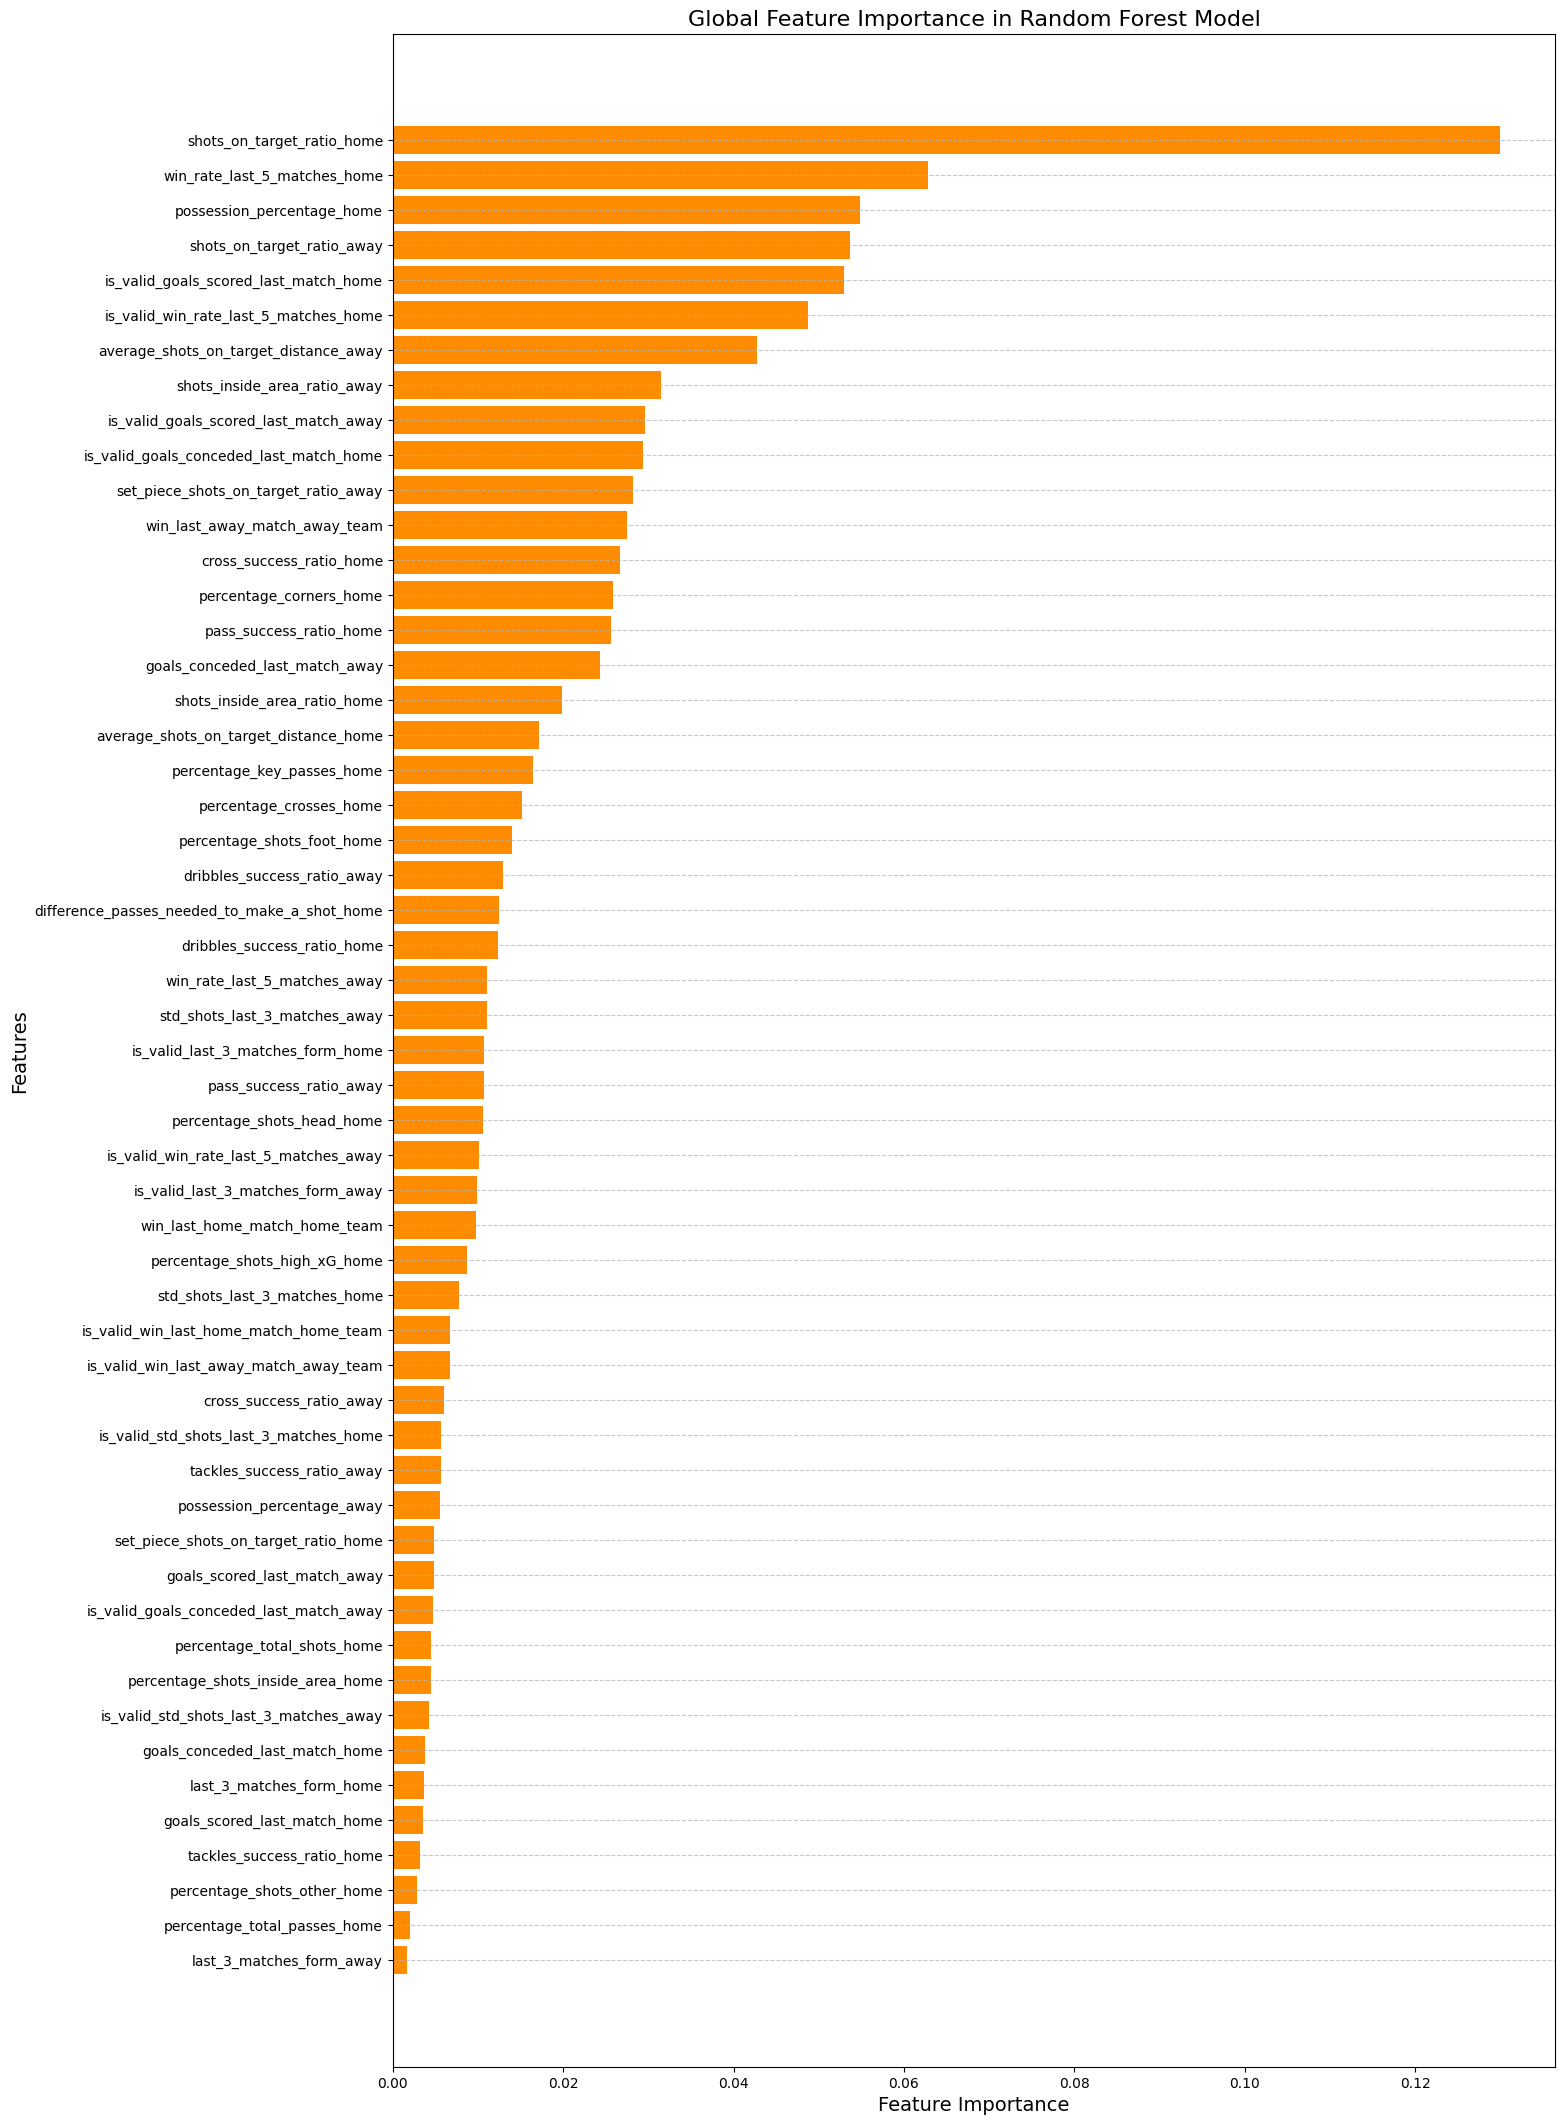

In [4]:
from src.analysis import random_forest_global_analysis

random_forest_global_analysis(best_model_Ligue1)

El modelo Random Forest ha determinado la relevancia de cada característica en la predicción del resultado de los partidos en la Ligue 1. A diferencia de la Regresión Logística, aquí se mide la importancia relativa de cada variable para el modelo en su conjunto, sin distinguir entre clases específicas (victoria local, empate o victoria visitante). Vamos a analizar el gráfico:

- **Caracterísiticas más importantes en la predicción**: Las características con mayor importancia en el modelo son aquellas que han tenido un impacto significativo en la clasificación del resultado del partido. Aunque no podemos determinar si una variable favorece a un equipo u otro, sí podemos intuir que estas características han sido relevantes en la toma de decisiones del modelo.
    - `shots_on_target_ratio_home`: El porcentaje de tiros a puerta del equipo local es la variable más influyente en el modelo. Esto sugiere que la precisión en los disparos es un aspecto clave para el resultado final del partido.
    - `win_rate_last_5_matches_home`: El rendimiento reciente del equipo local ha sido identificado como un factor relevante. Esto indica que los resultados obtenidos en los últimos encuentros han tenido una relación con el desenlace de los partidos en la competición.
    - `possession_percentage_away`: El porcentaje de posesión del equipo visitante ha sido una de las métricas con más peso. Aunque no podemos afirmar si más posesión se traduce en mejores resultados, sí podemos intuir que el control del balón está vinculado a ciertos patrones que el modelo ha identificado como influyentes.
    - `shots_on_target_ratio_away`: Al igual que ocurre con el equipo local, el porcentaje de tiros a puerta del equipo visitante es una característica importante. Esto refuerza la idea de que la generación de oportunidades y la precisión en los disparos tienen un papel determinante en el resultado del partido.
    - `is_valid_goals_scored_last_match_home`, `is_valid_goals_scored_last_match_away` y `is_valid_goals_conceded_last_match_home`: La variable que indica si los goles anotados/encajados en el último partido de los equipos fueron válidos (si tienen un significado válido porque ha habido un partido anterior de ese equipo) también ha sido considerada importante. Esto sugiere que el modelo ha encontrado una relación entre el desempeño ofensivo reciente, el desempeño defensivo reciente y los resultados de los partidos analizados.
    - `is_valid_win_rate_last_5_matches_home`: La varibale que indica si se pueden considerar el porcentaje de victoria del equipo local en los últimos cinco partidos se considera como importante. Esto sugiere que la forma en la que llega el equipo local tiene importancia en el resultado.
    - `average_shots_on_target_distance_away` y `average_shots_on_target_distance_home`: La distancia media de los tiros a puerta del equipo visitante y local cobran también importancia en la predicción del resultado del partido.
    - `shots_inside_area_ratio_away` y `shots_inside_area_ratio_home`: La frecuencia con la que los equipos logran disparar dentro del área también es una métrica con un peso relevante. Dado que los tiros dentro del área suelen tener una mayor probabilidad de acabar en gol, su importancia dentro del modelo es comprensible.
    - `set_piece_shots_on_target_ratio_away`: La precisión en jugadas a balón parado del equipo visitante también ha sido destacada por el modelo. Esto podría indicar que las acciones de estrategia como córners o tiros libres han tenido un peso en la predicción de los partidos.
    - `win_last_away_match_away_team`: Que el equipo visitante haya ganado o no su último partido fuera de casa influye también en el resultado. Con esto podemos deducir que la forma en su último partido en el que se encuentra en la misma situación (juega también fuera de casa) influye en el resultado.
    - `cross_success_ratio_home`, `pass_success_ratio_home` y `percentage_key_passes_home`: La efectividad en los centros, pases y los pases clave del equipo local han sido consideradas métricas relevantes. Esto sugiere que la calidad en la generación de jugadas de ataque es un aspecto que el modelo ha relacionado con los resultados de los partidos.
    - `difference_passes_needed_to_make_a_shot`: El estilo de juego en el partido de los equipos va a influir en el resultado. Veremos más adelante si favorece más a la victoria los equipos verticales (necesitan menos pases para realizar disparos) o los equipo más conservadores y que le dan mucha relevancia al control del juego (necesitan más pases para realizar disparos).

- **Características sin importancia en la predicción**: El modelo ha determinado que varias características no aportan información relevante en la clasificación del resultado del partido. Esto no significa que estas variables no tengan influencia en el fútbol en la Ligue 1, sino que, dentro de los datos analizados, el modelo no ha encontrado una relación clara con los resultados.
    - **Factores relacionados con el rendimiento reciente**:  Variables como `last_3_matches_form_home`, `last_3_matches_form_away`, `win_last_home_match_home_team` y `win_last_away_match_away_team` no han sido consideradas relevantes. Esto sugiere que, aunque el rendimiento reciente pueda ser un indicador del estado de forma de un equipo, los resultados individuales más cercanos no han sido determinantes en la predicción del modelo.
    - **Estadísticas defensivas y disciplinares**: 
        - Curiosamente, métricas como `tackles_success_ratio_home`, `percentage_tackles_home` y `percentage_recoveries_defensive_third_home` no han tenido importancia en el modelo. Esto podría indicar que el rendimiento defensivo es más difícil de modelar en términos de predicción de resultados, ya que su impacto puede depender de múltiples factores externos.
        - Otras métricas descartadas incluyen las tarjetas rojas (`percentage_red_cards_home`), las faltas cometidas (`percentage_penaltys_committed_home`) y los errores clave (`percentage_key_errors_home`). Su falta de relevancia sugiere que, aunque estos eventos pueden influir en ciertos partidos individuales, no han mostrado un patrón consistente en los datos analizados.
    - **Métricas ofensivas**: Es curioso como métricas ofensivas tan importantes como `percentage_shots_high_xG_home` tengan una importancia tan reducida a la hora de predecir el resultado.
    - **Otros factores tácticos y de juego**: El modelo también ha descartado estadísticas como `percentage_counterattacks_home` y `percentage_substitutions_home`. Esto podría indicar que la cantidad de veces que un equipo realiza estas acciones no tiene una relación clara con el desenlace del partido, o que su impacto depende de otros factores no considerados en el modelo.

**Conclusiones generales**: 

El modelo de Random Forest ha identificado que las métricas más relevantes para predecir el resultado de los partidos en la Ligue 1 están relacionadas con la eficiencia ofensiva y la generación de oportunidades de gol. Factores como la precisión en los tiros a puerta, la capacidad de generar disparos dentro del área y la posesión del balón han sido claves en la predicción del modelo.

Por otro lado, el modelo ha descartado métricas relacionadas con la defensa, la recuperación del balón y el rendimiento en los últimos partidos individuales, lo que sugiere que estos factores no han mostrado una relación clara con los resultados analizados. La falta de importancia de variables como los tackles, las recuperaciones y las tarjetas rojas indica que estos aspectos pueden no ser determinantes en la predicción del resultado final.

Es importante destacar que, aunque ciertas métricas han sido identificadas como más relevantes que otras, el modelo no nos indica en qué dirección afectan al resultado, solo que han sido utilizadas con mayor peso en la clasificación. Esto significa que, por ejemplo, una mayor posesión o un mayor número de tiros a puerta pueden estar correlacionados con el resultado, pero no podemos determinar si su aumento favorece a un equipo o simplemente es una característica común en los datos analizados.

En términos tácticos, podemos intuir que los equipos que logran generar oportunidades claras, tienen precisión en sus disparos y mantienen la posesión son los que tienen más probabilidades de obtener resultados favorables. Además, la importancia de las jugadas a balón parado sugiere que estas situaciones han jugado un papel clave en los desenlaces de los partidos.

En conclusión, la Ligue 1 parece estar influenciada en gran medida por el rendimiento ofensivo y la capacidad de generar ocasiones de gol. Aunque el modelo no nos dice exactamente cómo influyen estas características en cada partido, sí nos permite entender qué factores han sido más utilizados para la predicción del resultado. Esto aporta información valiosa para el análisis de los partidos del fútbol francés.